# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\datam\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\datam\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\datam\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\datam\anaconda3\Lib\site-packages\setuptools\_v

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.experimental.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\datam\AppData\Local\Temp\ipykernel_139356\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data1'

In [8]:
#Every Single Images for subfolder
#os.listdir(os.path.join(data_dir, "B1"))

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): #every folder inside of data directory
    for image in os.listdir(os.path.join(data_dir, image_class)): #every images inside of the each folders
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path) #open file as a numpy array
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) #image not exist, remove
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
#tf.data.Dataset?? #documentation

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
#automatically labels > super useful for image classification
data = tf.keras.utils.image_dataset_from_directory('data1')

Found 101 files belonging to 2 classes.


In [14]:
data #this is not a data in memory
#we want to grab actual data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
#We can get concecutive batches using .next
data_iterator = data.as_numpy_iterator() 

In [16]:
batch = data_iterator.next()

In [17]:
batch #batch of data, len(batch) is 2
#Why 2? one is for images, and one is for Labels

(array([[[[202.5664   , 214.5664   , 214.5664   ],
          [203.3164   , 215.3164   , 215.3164   ],
          [204.0625   , 216.0625   , 212.0625   ],
          ...,
          [212.82422  , 213.82422  , 218.82422  ],
          [212.9414   , 213.9414   , 218.9414   ],
          [214.04688  , 219.04688  , 225.04688  ]],
 
         [[205.53906  , 215.53906  , 214.53906  ],
          [206.02344  , 218.02344  , 218.02344  ],
          [206.72266  , 218.72266  , 218.72266  ],
          ...,
          [213.96094  , 214.96094  , 219.96094  ],
          [213.28906  , 214.28906  , 219.28906  ],
          [209.80469  , 212.80469  , 219.80469  ]],
 
         [[205.94531  , 215.94531  , 214.94531  ],
          [201.8789   , 213.8789   , 213.8789   ],
          [204.125    , 216.125    , 212.125    ],
          ...,
          [210.05469  , 211.05469  , 216.05469  ],
          [213.45312  , 214.45312  , 219.45312  ],
          [210.45312  , 213.45312  , 220.45312  ]],
 
         ...,
 
         [[1

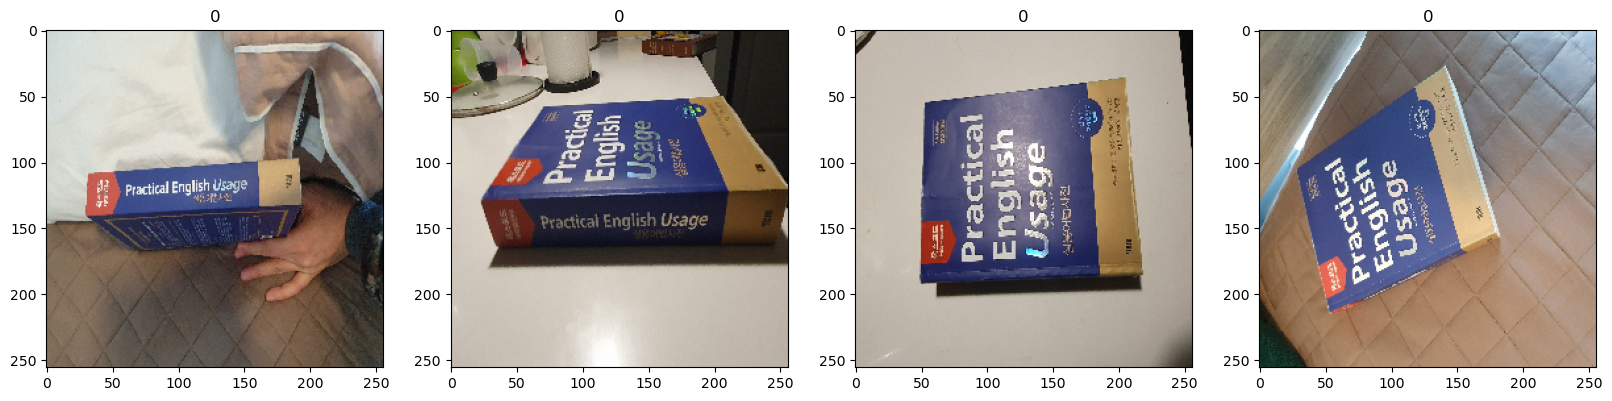

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#See the plot, 1 is B2, which is Brown Book

# 4. Scale Data

In [19]:
data = data.map(lambda x,y: (x/255, y))
#Divide all the data by 255, so every data is 0 to 1

In [20]:
data.as_numpy_iterator().next()

(array([[[[0.90072   , 0.90856314, 0.8889553 ],
          [0.8930147 , 0.90085787, 0.88125   ],
          [0.88863355, 0.8964767 , 0.87686884],
          ...,
          [0.61007965, 0.5316483 , 0.48851103],
          [0.6002911 , 0.5257813 , 0.4708793 ],
          [0.6184589 , 0.52826285, 0.4968903 ]],
 
         [[0.9014093 , 0.90925246, 0.8896446 ],
          [0.8956342 , 0.9034773 , 0.88386947],
          [0.8971661 , 0.9050092 , 0.88540137],
          ...,
          [0.5873468 , 0.5089154 , 0.46577817],
          [0.5879749 , 0.50170034, 0.45856312],
          [0.5942249 , 0.5040288 , 0.47265625]],
 
         [[0.8872396 , 0.8950827 , 0.8754749 ],
          [0.9025429 , 0.910386  , 0.8907782 ],
          [0.89485294, 0.9026961 , 0.88308823],
          ...,
          [0.5644301 , 0.48599878, 0.44286153],
          [0.5838082 , 0.4975337 , 0.45439646],
          [0.5786305 , 0.48843443, 0.4570619 ]],
 
         ...,
 
         [[0.4495864 , 0.398606  , 0.3633119 ],
          [0.43812

# 5. Split Data

In [35]:
train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)
test_size = int(len(data)*.3)

In [36]:
train_size

2

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [38]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [44]:
logdir='logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.5625

ValueError: Expected input data to be non-empty.

In [47]:
# For a TensorFlow Dataset
print("Training data size:", len(train))
print("Validation data size:", len(val))

# If your data is a generator, you might want to check the first batch
# Example for a generator
for x, y in train:
    print("Batch x shape:", x.shape)
    print("Batch y shape:", y.shape)
    break  # Only inspect the first batch


Training data size: 2
Validation data size: 0
Batch x shape: (32, 256, 256, 3)
Batch y shape: (32,)


# 8. Plot Performance

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

# WEB Page Building

In [1]:
!pip install streamlit

In [ ]:
!streamlit hello

In [ ]:
!streamlit --version

In [ ]:
import streamlit as st

picture = st.camera_input("Take a picture")

if picture:
    st.image(picture)
    
st.button("Add to database")
st.button("Edit on database")

from streamlit_jupyter import StreamlitPatcher, tqdm

StreamlitPatcher().jupyter()  # register streamlit with jupyter-compatible wrappers

In [ ]:
!streamlit run test.py